In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import tqdm

In [2]:
df = pd.read_csv("../../csvs/Human_Body/Aids_Virus_detection/AIDS_Classification_50000.csv")

In [3]:
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


<Axes: xlabel='infected', ylabel='cd80'>

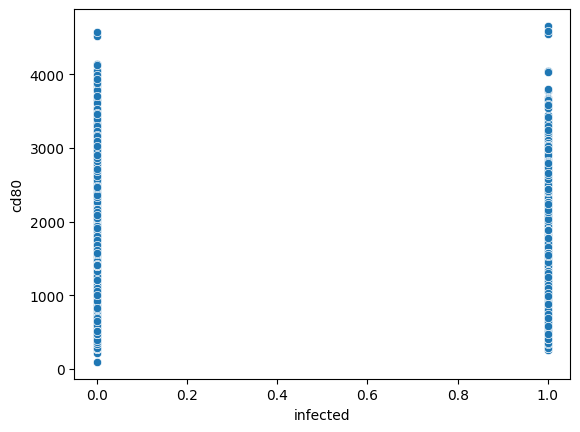

In [4]:
sns.scatterplot(data = df , x= "infected" , y= "cd80")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [6]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.164020,75.861991,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,...,0.575200,1.936420,0.083460,0.734160,0.342220,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,1.233272,7.091152,12.028730,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,...,0.494318,0.895318,0.276579,0.441784,0.474458,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


In [7]:
df.corr()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
time,1.000000,0.051746,0.006911,0.039390,-0.019287,0.056241,-0.012310,0.021562,-0.021745,-0.074956,...,-0.078147,-0.068901,-0.019133,0.068051,-0.101019,0.040720,0.089658,0.018400,0.026256,-0.102671
trt,0.051746,1.000000,0.040517,0.010247,0.002240,0.064000,-0.005980,-0.038132,-0.004581,-0.001674,...,0.000497,0.003392,-0.018105,0.232762,-0.027697,0.013352,0.028357,-0.004262,0.019198,-0.047112
age,0.006911,0.040517,1.000000,0.001856,-0.017836,0.108080,0.002495,-0.046430,0.011142,0.118811,...,0.121492,0.109482,0.001566,0.041837,-0.049142,-0.053918,-0.065441,0.005863,-0.001756,0.028718
wtkg,0.039390,0.010247,0.001856,1.000000,-0.034036,0.089131,-0.016851,0.008592,-0.004932,-0.106208,...,-0.104913,-0.092254,0.004827,0.001226,-0.029979,0.047813,0.066893,0.019929,-0.006143,-0.055527
hemo,-0.019287,0.002240,-0.017836,-0.034036,1.000000,-0.068466,0.001203,-0.002599,0.013915,0.064002,...,0.062104,0.063511,-0.002698,0.008057,0.011043,-0.034345,-0.034451,-0.004844,-0.004207,0.026407
homo,0.056241,0.064000,0.108080,0.089131,-0.068466,1.000000,-0.051067,-0.011770,0.008095,-0.013145,...,-0.010187,0.010497,0.022002,0.072673,-0.103003,0.000200,-0.010264,0.025367,-0.004070,-0.007341
drugs,-0.012310,-0.005980,0.002495,-0.016851,0.001203,-0.051067,1.000000,0.010188,-0.010457,-0.033090,...,-0.040928,-0.045483,0.000906,-0.009026,0.037158,0.025400,0.027702,-0.005788,0.006794,-0.025684
karnof,0.021562,-0.038132,-0.046430,0.008592,-0.002599,-0.011770,0.010188,1.000000,0.000356,-0.131726,...,-0.136562,-0.130202,0.008108,-0.053328,-0.025224,0.045776,0.062692,0.023325,0.013964,-0.025860
oprior,-0.021745,-0.004581,0.011142,-0.004932,0.013915,0.008095,-0.010457,0.000356,1.000000,0.058107,...,0.065423,0.070862,0.017419,-0.011640,-0.008963,-0.041128,-0.042355,0.006786,-0.010503,0.043416
z30,-0.074956,-0.001674,0.118811,-0.106208,0.064002,-0.013145,-0.033090,-0.131726,0.058107,1.000000,...,0.605567,0.573218,0.022249,0.010907,-0.007565,-0.217151,-0.284487,-0.018809,0.001278,0.238531


In [8]:
df["infected_z30"] = df["infected"] + df["z30"]
df["infected_str2"] = df["infected"] + df["str2"]
df["infected_strat"] = df["infected"] + df["strat"]

In [9]:
df.isnull().sum()

time              0
trt               0
age               0
wtkg              0
hemo              0
homo              0
drugs             0
karnof            0
oprior            0
z30               0
preanti           0
race              0
gender            0
str2              0
strat             0
symptom           0
treat             0
offtrt            0
cd40              0
cd420             0
cd80              0
cd820             0
infected          0
infected_z30      0
infected_str2     0
infected_strat    0
dtype: int64

In [10]:
#sns.scatterplot(data = df)

<Axes: xlabel='infected', ylabel='age'>

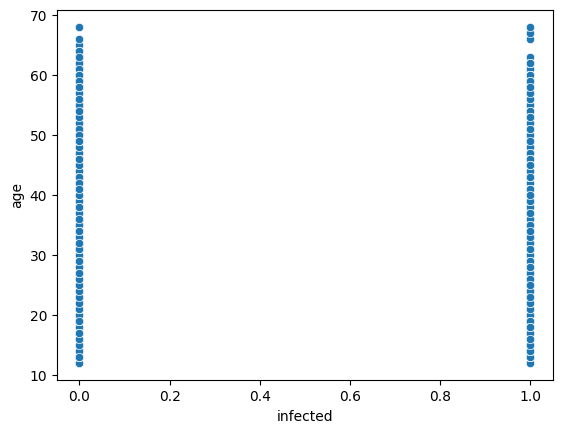

In [11]:
sns.scatterplot(data = df , x= "infected" , y= "age")

<Axes: xlabel='infected', ylabel='time'>

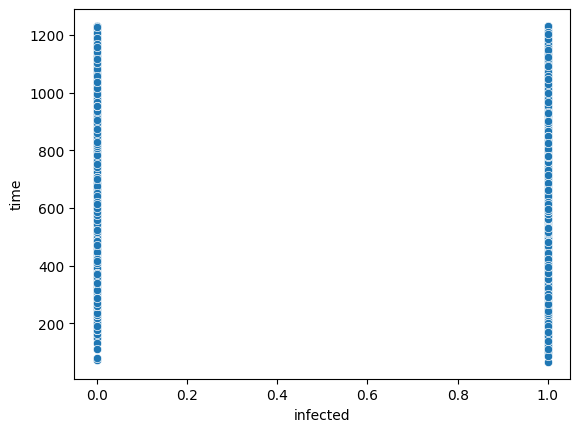

In [12]:
sns.scatterplot(data = df , x= "infected" , y= "time")

<Axes: xlabel='infected', ylabel='drugs'>

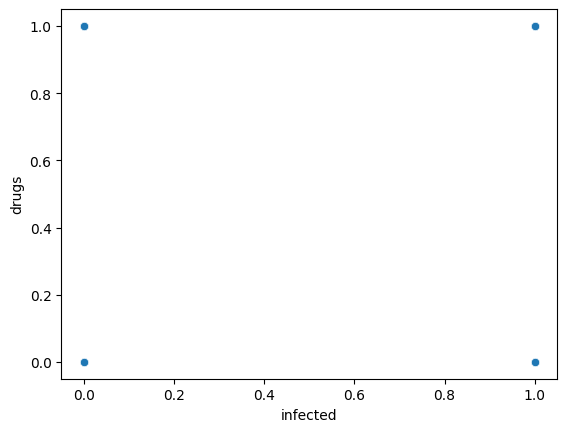

In [13]:
sns.scatterplot(data = df , x= "infected" , y= "drugs")

In [14]:
X = df.drop(df[["infected"]], axis = 1).values
print(X.shape)
X

(50000, 25)


array([[1.073e+03, 1.000e+00, 3.700e+01, ..., 2.000e+00, 2.000e+00,
        3.000e+00],
       [3.240e+02, 0.000e+00, 3.300e+01, ..., 2.000e+00, 2.000e+00,
        4.000e+00],
       [4.950e+02, 1.000e+00, 4.300e+01, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       ...,
       [1.157e+03, 0.000e+00, 4.000e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.960e+02, 0.000e+00, 3.100e+01, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       [6.120e+02, 2.000e+00, 4.100e+01, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [15]:
y = df["infected"].values.reshape(-1,1)
print(y.shape)
y

(50000, 1)


array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [16]:
le = LabelEncoder()
y = le.fit_transform(y)

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
X_train , X_test , y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      train_size=0.8,
                                                      shuffle=True)

In [18]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
X_train =T.from_numpy(X_train)
X_test =T.from_numpy(X_test)
y_train =T.from_numpy(y_train)
y_test =T.from_numpy(y_test)

In [21]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_train))



<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [22]:
X_train.shape[1]

25

In [23]:
X_train.squeeze()

tensor([[0.8223, 0.0000, 0.5536,  ..., 0.0000, 0.0000, 0.0000],
        [0.9313, 0.0000, 0.1964,  ..., 0.5000, 0.5000, 0.6667],
        [0.8961, 0.3333, 0.2500,  ..., 0.5000, 0.5000, 0.0000],
        ...,
        [0.9245, 1.0000, 0.3571,  ..., 0.5000, 0.0000, 0.0000],
        [0.9056, 0.6667, 0.4464,  ..., 0.5000, 0.5000, 0.3333],
        [0.9760, 0.0000, 0.2679,  ..., 0.0000, 0.5000, 0.0000]],
       dtype=torch.float64)

In [24]:
y_train

tensor([0, 0, 0,  ..., 0, 1, 0])

In [25]:
class Aids_Detection(nn.Module):
    
    def __init__(self, input_dims = X_train.shape[1] , hidden_units = 125 * 2 , output_dims = 1 ) :
        super().__init__()
        self.droprate = (0.2)
        self.dropout = nn.Dropout(p = self.droprate)
        self.activation = nn.LeakyReLU()
        
        self.ll1 = nn.Linear(in_features=input_dims , out_features= hidden_units)
        self.ll2 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        
        self.ll3 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        self.ll4 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        
        self.ll5 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        self.ll6 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        
        self.ll7 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        self.ll8 = nn.Linear(in_features=hidden_units, out_features= hidden_units)
        
        self.ll9 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        self.ll10 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        
        self.ll11 = nn.Linear(in_features=hidden_units , out_features= hidden_units)
        self.ll12 = nn.Linear(in_features=hidden_units, out_features= output_dims)
        
    def forward(self , X):
        
        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll3(X))
        X = self.activation(self.ll4(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll5(X))
        X = self.activation(self.ll6(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll7(X))
        X = self.activation(self.ll8(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll9(X))
        X = self.activation(self.ll10(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll11(X))
        X = self.ll12(X)
        
        return X
    
class training_and_testing():
    
    def __init__(self):
        self.lr = 1e-6
        self.epochs = 10
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.model = Aids_Detection().to(self.device)
        self.optimizer = opt.Adam(self.model.parameters() , lr = self.lr)
        self.loss = nn.BCEWithLogitsLoss()
        
        self.X_train = X_train.float()
        self.X_test = X_test.float()
        self.y_train = y_train.float()
        self.y_test = y_test.float()
        
        self.batch_size = 32
        
    def train_loop(self):
        
        running_loss = []
        train_acc = []
        test_acc  = []
        
        for i in range(self.epochs):
            
            acc = 0.0
            total_pred = []
            label = []
            
            with tqdm.tqdm(iterable=range(0 , len(self.X_train) , self.batch_size) , disable= False) as p_bar:
                p_bar.set_description(f"Epoch : {i + 1} / {self.epochs}")
                
                for start in p_bar:
                    self.model.train()
                    end = start + self.batch_size
                    X_batch = self.X_train[start : end]
                    y_batch = self.y_train[start : end].unsqueeze(1)
                    
                    f_pass = self.model(X_batch)
                    
                    loss = self.loss(f_pass , y_batch)
                    
                    self.optimizer.zero_grad()
                    
                    loss.backward()
                    
                    self.optimizer.step()
                    
                    loss_acc = loss.item()
                    acc += loss_acc * X_batch.size(0)
                    
                    pred = T.sigmoid(f_pass) >= 0.5
                    #train_acc.extend(pred.cpu().numpy())
                    #label.extend(y_batch.cpu().numpy())
                    p_bar.set_postfix(loss=float(acc / ((start // self.batch_size + 1) * self.batch_size)))
                    
            acc / len(self.X_train)
            acc_score = accuracy_score(label , total_pred)
            
            running_loss.append(acc)
            train_acc.append(acc_score)
            
            test_score = self.test_loop()
            test_acc.append(test_score)
            
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.title('Model Performance Over Epochs')
        plt.plot(range(1, self.epochs + 1), running_loss, label='Loss')
        plt.plot(range(1, self.epochs + 1),train_acc, label='Train Accuracy')
        plt.plot(range(1, self.epochs + 1), test_acc, label='Test Accuracy')
        plt.yscale('log') 
        plt.xscale('log') 
        plt.legend()
        plt.show()
        
    def test_loop(self):
        
        self.model.eval()
        
        all_preds = []
        all_labels = []
        
        with T.no_grad():
            for start in range(0, len(self.X_test), self.batch_size):
                end = start + self.batch_size
                X_batch = self.X_test[start:end]
                y_batch = self.y_test[start:end].unsqueeze(1)
                
                f_pass = self.model(X_batch)
                
                y_pred = T.sigmoid(f_pass) >= 0.5
                all_preds.extend(y_pred.cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())
                
        return accuracy_score(all_labels, all_preds)

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Epoch : 1 / 10: 100%|██████████| 1250/1250 [00:17<00:00, 72.48it/s, loss=0.681]
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Epoch : 2 / 10: 100%|██████████| 1250/1250 [00:16<00:00, 75.43it/s, loss=0.672]
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\numpy\

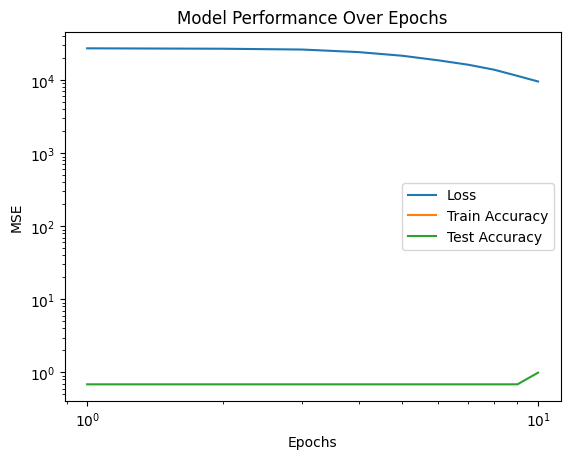

0.6862

In [26]:
training_and_testing().train_loop()
training_and_testing().test_loop()

Epoch : 1 / 10:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch : 10 / 10: 100%|██████████| 1250/1250 [00:18<00:00, 65.81it/s, loss=0.236]


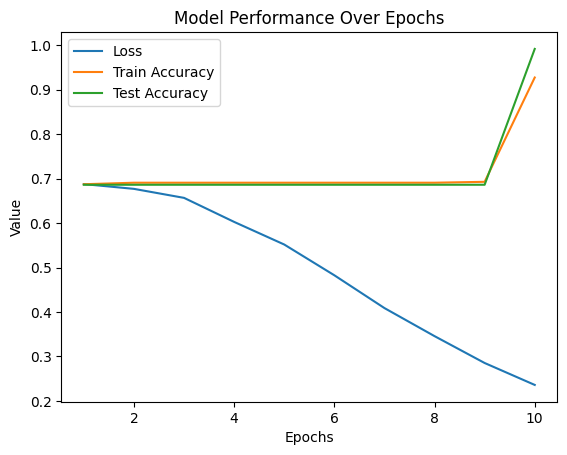

In [27]:
import torch as T
import torch.nn as nn
import torch.optim as opt
import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Aids_Detection(nn.Module):
    
    def __init__(self, input_dims=X_train.shape[1], hidden_units=125 * 2, output_dims=1):
        super().__init__()
        self.droprate = 0.2
        self.dropout = nn.Dropout(p=self.droprate)
        self.activation = nn.LeakyReLU()
        
        self.ll1 = nn.Linear(in_features=input_dims, out_features=hidden_units)
        self.ll2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        
        self.ll3 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.ll4 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        
        self.ll5 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.ll6 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        
        self.ll7 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.ll8 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        
        self.ll9 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.ll10 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        
        self.ll11 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.ll12 = nn.Linear(in_features=hidden_units, out_features=output_dims)
        
    def forward(self, X):
        
        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll3(X))
        X = self.activation(self.ll4(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll5(X))
        X = self.activation(self.ll6(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll7(X))
        X = self.activation(self.ll8(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll9(X))
        X = self.activation(self.ll10(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll11(X))
        X = self.ll12(X)
        
        return X
    
class training_and_testing():
    
    def __init__(self):
        self.lr = 1e-6
        self.epochs = 10
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.model = Aids_Detection().to(self.device)
        self.optimizer = opt.Adam(self.model.parameters(), lr=self.lr)
        self.loss = nn.BCEWithLogitsLoss()
        
        self.X_train = X_train.float().to(self.device)
        self.X_test = X_test.float().to(self.device)
        self.y_train = y_train.float().to(self.device)
        self.y_test = y_test.float().to(self.device)
        
        self.batch_size = 32
        
    def train_loop(self):
        
        running_loss = []
        train_acc = []
        test_acc = []
        
        for i in range(self.epochs):
            
            epoch_loss = 0.0
            total_pred = []
            label = []
            
            self.model.train()
            with tqdm.tqdm(iterable=range(0, len(self.X_train), self.batch_size), disable=False) as p_bar:
                p_bar.set_description(f"Epoch : {i + 1} / {self.epochs}")
                
                for start in p_bar:
                    end = start + self.batch_size
                    X_batch = self.X_train[start:end]
                    y_batch = self.y_train[start:end].unsqueeze(1)
                    
                    f_pass = self.model(X_batch)
                    
                    loss = self.loss(f_pass, y_batch)
                    
                    self.optimizer.zero_grad()
                    
                    loss.backward()
                    
                    self.optimizer.step()
                    
                    loss_val = loss.item()
                    epoch_loss += loss_val * X_batch.size(0)
                    
                    pred = T.sigmoid(f_pass) >= 0.5
                    total_pred.extend(pred.cpu().numpy())
                    label.extend(y_batch.cpu().numpy())
                    p_bar.set_postfix(loss=float(epoch_loss / ((start // self.batch_size + 1) * self.batch_size)))
                    
            epoch_loss /= len(self.X_train)
            acc_score = accuracy_score(label, total_pred)
            running_loss.append(epoch_loss)
            train_acc.append(acc_score)
            
            test_score = self.test_loop()
            test_acc.append(test_score)
            
        plt.xlabel('Epochs')
        plt.ylabel('Value')
        plt.title('Model Performance Over Epochs')
        plt.plot(range(1, self.epochs + 1), running_loss, label='Loss')
        plt.plot(range(1, self.epochs + 1), train_acc, label='Train Accuracy')
        plt.plot(range(1, self.epochs + 1), test_acc, label='Test Accuracy')
        plt.legend()
        plt.show()
        
    def test_loop(self):
        
        self.model.eval()
        
        all_preds = []
        all_labels = []
        
        with T.no_grad():
            for start in range(0, len(self.X_test), self.batch_size):
                end = start + self.batch_size
                X_batch = self.X_test[start:end]
                y_batch = self.y_test[start:end].unsqueeze(1)
                
                f_pass = self.model(X_batch)
                
                y_pred = T.sigmoid(f_pass) >= 0.5
                all_preds.extend(y_pred.cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())
                
        return accuracy_score(all_labels, all_preds)

# Assuming you have your data loaded in X_train, X_test, y_train, and y_test
trainer = training_and_testing()
trainer.train_loop()
